In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.dates as mdates

In [12]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os

# Define the list of company symbols in the Danish C25 index
c25_companies = [
    'CARL-B.CO', 'CHR.CO', 'COLO-B.CO', 'DANSKE.CO', 'DSV.CO',
    'MAERSK-B.CO', 'NDA-DK.CO', 'NOVO-B.CO', 'GN.CO',
    'ORSTED.CO', 'PNDORA.CO', 'RBREW.CO', 'TRYG.CO',
    'VWS.CO', 'DEMANT.CO', 'ROCK-B.CO', 'JYSK.CO', 
]

# Set the start and end dates for the data collection
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=5 * 365)).strftime('%Y-%m-%d')

# Create a directory to store the data
output_dir = 'c25_stock_data'
os.makedirs(output_dir, exist_ok=True)

# Collect stock data for each company
data_collection = {}

for symbol in c25_companies:
    print(f"Collecting data for {symbol}...")
    try:
        # Retrieve the stock data
        data = yf.download(symbol, start=start_date, end=end_date, interval='1mo')

        # Save the data to a CSV file
        filename = f"{output_dir}/{symbol}.csv"
        data.to_csv(filename)

        # Store the data for later use
        data_collection[symbol] = data

        print(f"Data collected for {symbol}")
    except Exception as e:
        print(f"Error collecting data for {symbol}: {e}")
print("Data collection and plotting complete.")


[*********************100%***********************]  1 of 1 completed
Data collected for CARL-B.CO
[*********************100%***********************]  1 of 1 completed
Data collected for CHR.CO
[*********************100%***********************]  1 of 1 completed
Data collected for COLO-B.CO
[*********************100%***********************]  1 of 1 completed
Data collected for DANSKE.CO
[*********************100%***********************]  1 of 1 completed
Data collected for DSV.CO
[*********************100%***********************]  1 of 1 completed
Data collected for MAERSK-B.CO
[*********************100%***********************]  1 of 1 completed
Data collected for NDA-DK.CO
[*********************100%***********************]  1 of 1 completed
Data collected for NOVO-B.CO
[*********************100%***********************]  1 of 1 completed
Data collected for GN.CO
[*********************100%***********************]  1 of 1 completed
Data collected for ORSTED.CO
[*********************100%**

[*********************100%***********************]  1 of 1 completed
Data collected for CARL-B.CO
[*********************100%***********************]  1 of 1 completed
Data collected for CHR.CO
[*********************100%***********************]  1 of 1 completed
Data collected for COLO-B.CO
[*********************100%***********************]  1 of 1 completed
Data collected for DANSKE.CO
[*********************100%***********************]  1 of 1 completed
Data collected for DSV.CO
[*********************100%***********************]  1 of 1 completed
Data collected for MAERSK-B.CO
[*********************100%***********************]  1 of 1 completed
Data collected for NDA-DK.CO
[*********************100%***********************]  1 of 1 completed
Data collected for NOVO-B.CO
[*********************100%***********************]  1 of 1 completed
Data collected for GN.CO
[*********************100%***********************]  1 of 1 completed
Data collected for ORSTED.CO
[*********************100%**

ValueError: ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF', '#800000', '#008000', '#000080', '#808000', '#800080', '#008080', '#C0C0C0', '#808080', '#FFA500'] is not a valid value for color

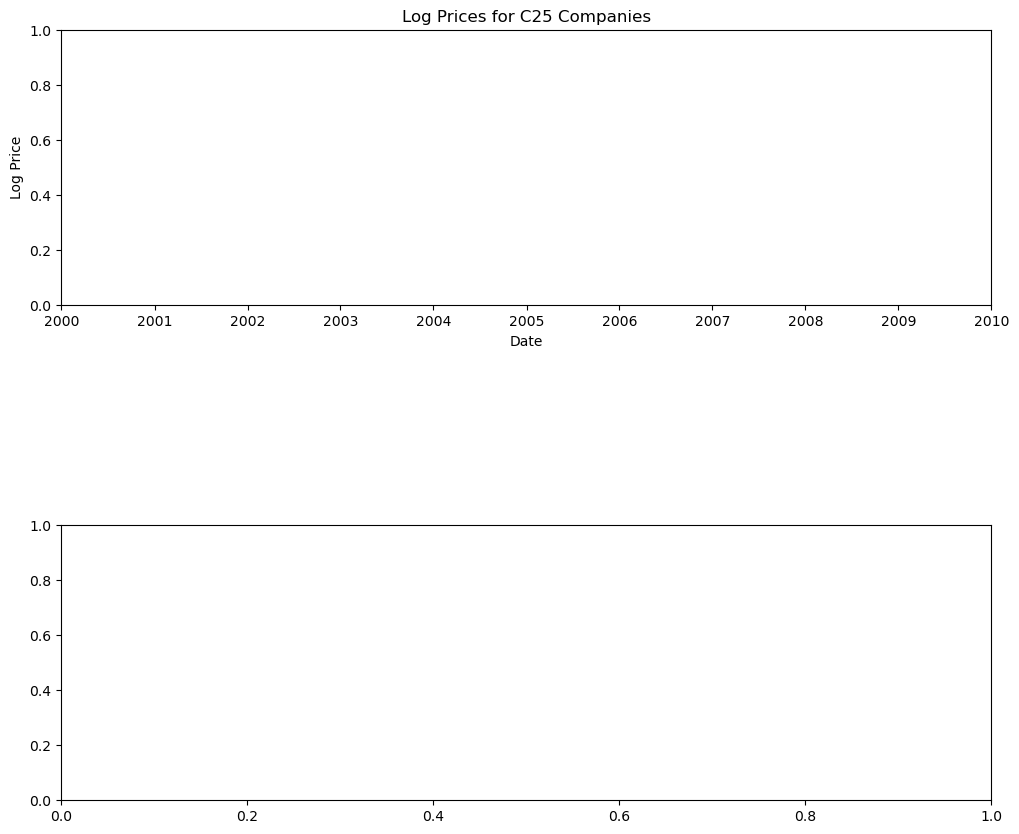

In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os
import numpy as np

# Define the list of company symbols in the Danish C25 index
c25_companies = [
    'CARL-B.CO', 'CHR.CO', 'COLO-B.CO', 'DANSKE.CO', 'DSV.CO',
    'MAERSK-B.CO', 'NDA-DK.CO', 'NOVO-B.CO', 'GN.CO',
    'ORSTED.CO', 'PNDORA.CO', 'RBREW.CO', 'TRYG.CO',
    'VWS.CO', 'DEMANT.CO', 'ROCK-B.CO', 'JYSK.CO',
]

# Set the start and end dates for the data collection
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=5 * 365)).strftime('%Y-%m-%d')

# Create a directory to store the data
output_dir = 'c25_stock_data'
os.makedirs(output_dir, exist_ok=True)

# Collect stock data for each company
data_collection = {}

for symbol in c25_companies:
    print(f"Collecting data for {symbol}...")
    try:
        # Retrieve the stock data
        data = yf.download(symbol, start=start_date, end=end_date, interval='1mo')

        # Save the data to a CSV file
        filename = f"{output_dir}/{symbol}.csv"
        data.to_csv(filename)

        # Store the data for later use
        data_collection[symbol] = data

        print(f"Data collected for {symbol}")
    except Exception as e:
        print(f"Error collecting data for {symbol}: {e}")
print("Data collection complete.")

# Create subplots for log prices and log price differences with more distance
fig, axs = plt.subplots(2, 1, figsize=(12, 10))
plt.subplots_adjust(hspace=0.8)

# define a list of colors to use
colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF', '#800000', '#008000', '#000080', '#808000', '#800080', '#008080', '#C0C0C0', '#808080', '#FFA500']

# Plot log prices for all companies
axs[0].set_title("Log Prices for C25 Companies")
axs[0].set_xlabel("Date")
axs[0].set_ylabel("Log Price")

for symbol, data in data_collection.items():
    data['Log_Price'] = np.log(data['Close'])
    axs[0].plot(data.index, data['Log_Price'], label=symbol, color=colors)

axs[0].grid(True)

# Move the legend box to the lower center of the plot, below the date axis
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=4)

# Plot log price differences for all companies
axs[1].set_title("Log Price Differences for C25 Companies")
axs[1].set_xlabel("Date")
axs[1].set_ylabel("Log Price Difference")

for symbol, data in data_collection.items():
    data['Log_Price_Diff'] = data['Log_Price'].diff()
    axs[1].plot(data.index, data['Log_Price_Diff'], label=symbol)

axs[1].grid(True)

# Move the legend box to the lower center of the plot, below the date axis
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=4)

# Display the plot
plt.show()
